# 前馈神经网络

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch01/forward_net.py

In [1]:
# coding: utf-8
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 将所有的权重汇总到列表
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


x = np.random.randn(10, 2)

print(x)

model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)

[[-0.30834003 -0.06579832]
 [-0.6295676  -0.80444605]
 [-0.01685085 -0.38525012]
 [-0.70253815  0.14422036]
 [ 0.15505879 -1.05501557]
 [-0.17494723  0.51660855]
 [ 0.20985684  0.64778033]
 [ 0.69458196 -0.70942061]
 [-0.09277879 -1.57050443]
 [ 0.25062051 -1.39298815]]
[[-3.05772457e+00 -2.60360790e-02 -9.42533224e-01]
 [-3.01628072e+00 -1.13672094e-01 -8.87446064e-01]
 [-2.91303378e+00 -1.38681717e-01 -5.73889828e-01]
 [-3.22190525e+00  9.24841199e-02 -1.35911930e+00]
 [-2.75257618e+00 -2.79126287e-01 -1.96587330e-01]
 [-3.11803667e+00  6.42211766e-02 -1.08266520e+00]
 [-3.03201096e+00  3.75781013e-04 -8.52611145e-01]
 [-2.70540075e+00 -2.85002246e-01  6.69016770e-03]
 [-2.72780795e+00 -3.44036463e-01 -2.00694975e-01]
 [-2.67611220e+00 -3.40577442e-01 -2.99368108e-02]]


# 双层网络

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch01/two_layer_net.py

In [2]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 将所有的权重和梯度汇总到列表
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

# 训练网络

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch01/train.py

In [3]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
# from two_layer_net import TwoLayerNet

# 设置超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

| epoch 196 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 197 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 198 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 199 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 200 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 201 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 202 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 203 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 204 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 205 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 206 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 207 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 208 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 209 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 210 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 211 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 212 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 213 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 214 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 215 |  iter 1 / 10 | ti

<Figure size 640x480 with 1 Axes>

# 绘制螺旋数据集

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch01/show_spiral_dataset.py

x (300, 2)
t (300, 3)


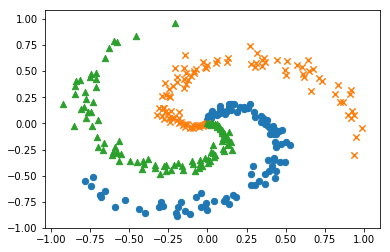

In [4]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
from dataset import spiral
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)  # (300, 3)

# 绘制数据点
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

# 训练自定义循环

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch01/train_custom_loop.py

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

| epoch 241 |  iter 10 / 10 | loss 0.13
| epoch 242 |  iter 10 / 10 | loss 0.13
| epoch 243 |  iter 10 / 10 | loss 0.13
| epoch 244 |  iter 10 / 10 | loss 0.13
| epoch 245 |  iter 10 / 10 | loss 0.13
| epoch 246 |  iter 10 / 10 | loss 0.13
| epoch 247 |  iter 10 / 10 | loss 0.13
| epoch 248 |  iter 10 / 10 | loss 0.13
| epoch 249 |  iter 10 / 10 | loss 0.13
| epoch 250 |  iter 10 / 10 | loss 0.13
| epoch 251 |  iter 10 / 10 | loss 0.13
| epoch 252 |  iter 10 / 10 | loss 0.12
| epoch 253 |  iter 10 / 10 | loss 0.12
| epoch 254 |  iter 10 / 10 | loss 0.12
| epoch 255 |  iter 10 / 10 | loss 0.12
| epoch 256 |  iter 10 / 10 | loss 0.12
| epoch 257 |  iter 10 / 10 | loss 0.12
| epoch 258 |  iter 10 / 10 | loss 0.12
| epoch 259 |  iter 10 / 10 | loss 0.13
| epoch 260 |  iter 10 / 10 | loss 0.12
| epoch 261 |  iter 10 / 10 | loss 0.13
| epoch 262 |  iter 10 / 10 | loss 0.12
| epoch 263 |  iter 10 / 10 | loss 0.12
| epoch 264 |  iter 10 / 10 | loss 0.13
| epoch 265 |  iter 10 / 10 | loss 0.12


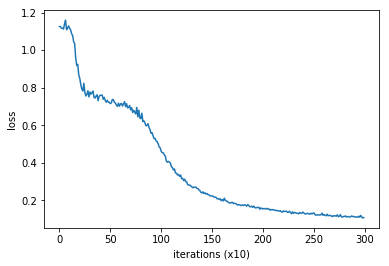

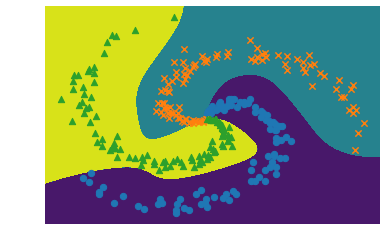

In [5]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
#from two_layer_net import TwoLayerNet


# 设置超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学习时使用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 求梯度、更新参数
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期输出学习进度
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 显示学习结果
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 显示边界区域
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()